In [171]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tools.dataframe_tools as dftool

# 设置绘图样式
plt.style.use(['science','no-latex'])


def get_result(data):
    step =900
    end =7200
    d_t = 300
    df_result = pd.DataFrame(columns=["from","to","flow_p","flow_t","time_p","time_t"])
    types =["passenger", "truck", "coach", "trailer"]
    index =0
    while step + d_t < end:
        from_t = step
        to_t = step + d_t

        df_p = data.loc[(data["time_y"]>=from_t) & (data["time_y"]<to_t) & (data["vclass_x"]==types[0]),:]
        df_t = data.loc[(data["time_y"]>=from_t) & (data["time_y"]<to_t) & (data["vclass_x"]!=types[0]),:]
        df_result.loc[index,"from"] = from_t
        df_result.loc[index,"to"] = to_t
        df_result.loc[index,"flow_p"] = sum(df_p["pcu"])
        df_result.loc[index,"flow_t"] = sum(df_t["pcu"])
        df_result.loc[index, "time_p"] = df_p["travel_time"].mean()
        df_result.loc[index, "time_t"] = sum(df_t["travel_time"]*df_t["pcu"])/sum(df_t["pcu"])
        step = to_t
        index +=1
    df_result["flow_all"]=df_result["flow_p"]+df_result["flow_t"]
    df_result["time_all"] = (df_result["flow_p"]*df_result["time_p"] + df_result["flow_t"]*df_result["time_t"]) / df_result["flow_all"]
    return df_result.copy()

In [172]:

numline = 4

path_result = "data/result/"+str(numline)+"/" +"3" +"_17_"

path_mpc = path_result + "mpc" + ".csv"
path_feedback = path_result + "feedback" + ".csv"
path_no = path_result + "no" + ".csv"

data_mpc = dftool.df_load_csv(path_mpc)
data_feedback = dftool.df_load_csv(path_feedback)
data_no = dftool.df_load_csv(path_no)
list_static = []
for i in range(numline):
    list_static.append(dftool.df_load_csv(path_result + "static_" + str(i) + ".csv"))

### 数据处理
data_mpc = get_result(data_mpc)
data_feedback = get_result(data_feedback)
data_no = get_result(data_no)
data_static = []
for i in range(numline):
    data_static.append(get_result(list_static[i]))


开始画图

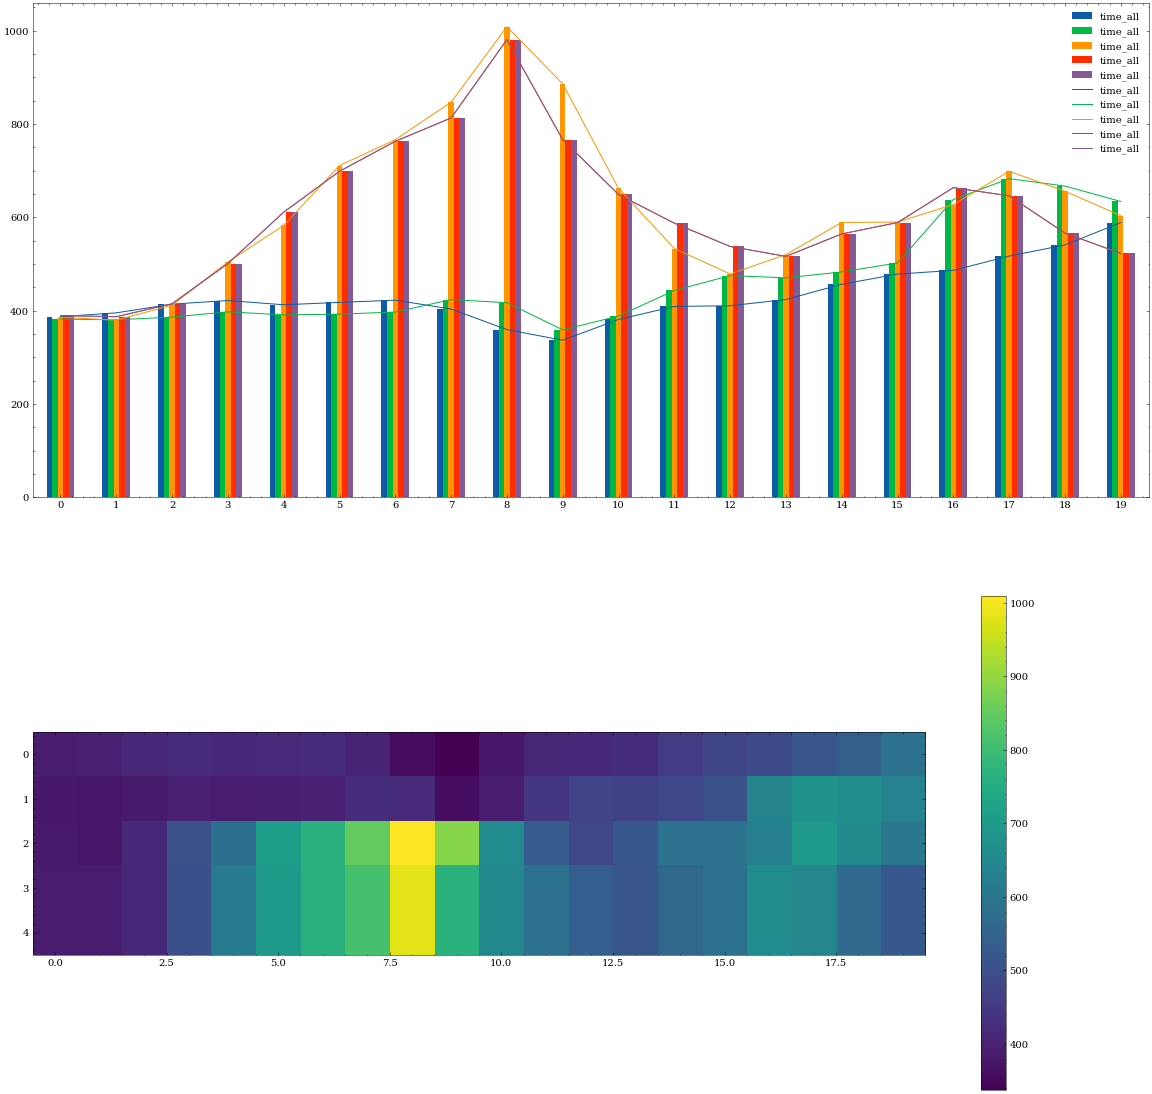

In [173]:
# 画图
plt.style.use(['science', 'no-latex'])

label = "time_all"
fig, axes = plt.subplots(2, 1, figsize=(20, 30))

data_plot=pd.concat([data_mpc[label],data_feedback[label],data_static[0][label],data_static[1][label],data_static[1][label]], axis=1)
data_plot.plot(kind='bar',stacked = False,figsize=(20,20),ax=axes[0])
data_plot.plot(kind='line',ax=axes[0])

label = "time_all"

data_plot=pd.concat([data_mpc[label],data_feedback[label],data_static[0][label],data_static[1][label],data_static[1][label]], axis=1)


data_plot=data_plot.astype('float').values.T
c = axes[1].imshow(data_plot)
fig.colorbar(c,ax=axes[1])
plt.show()


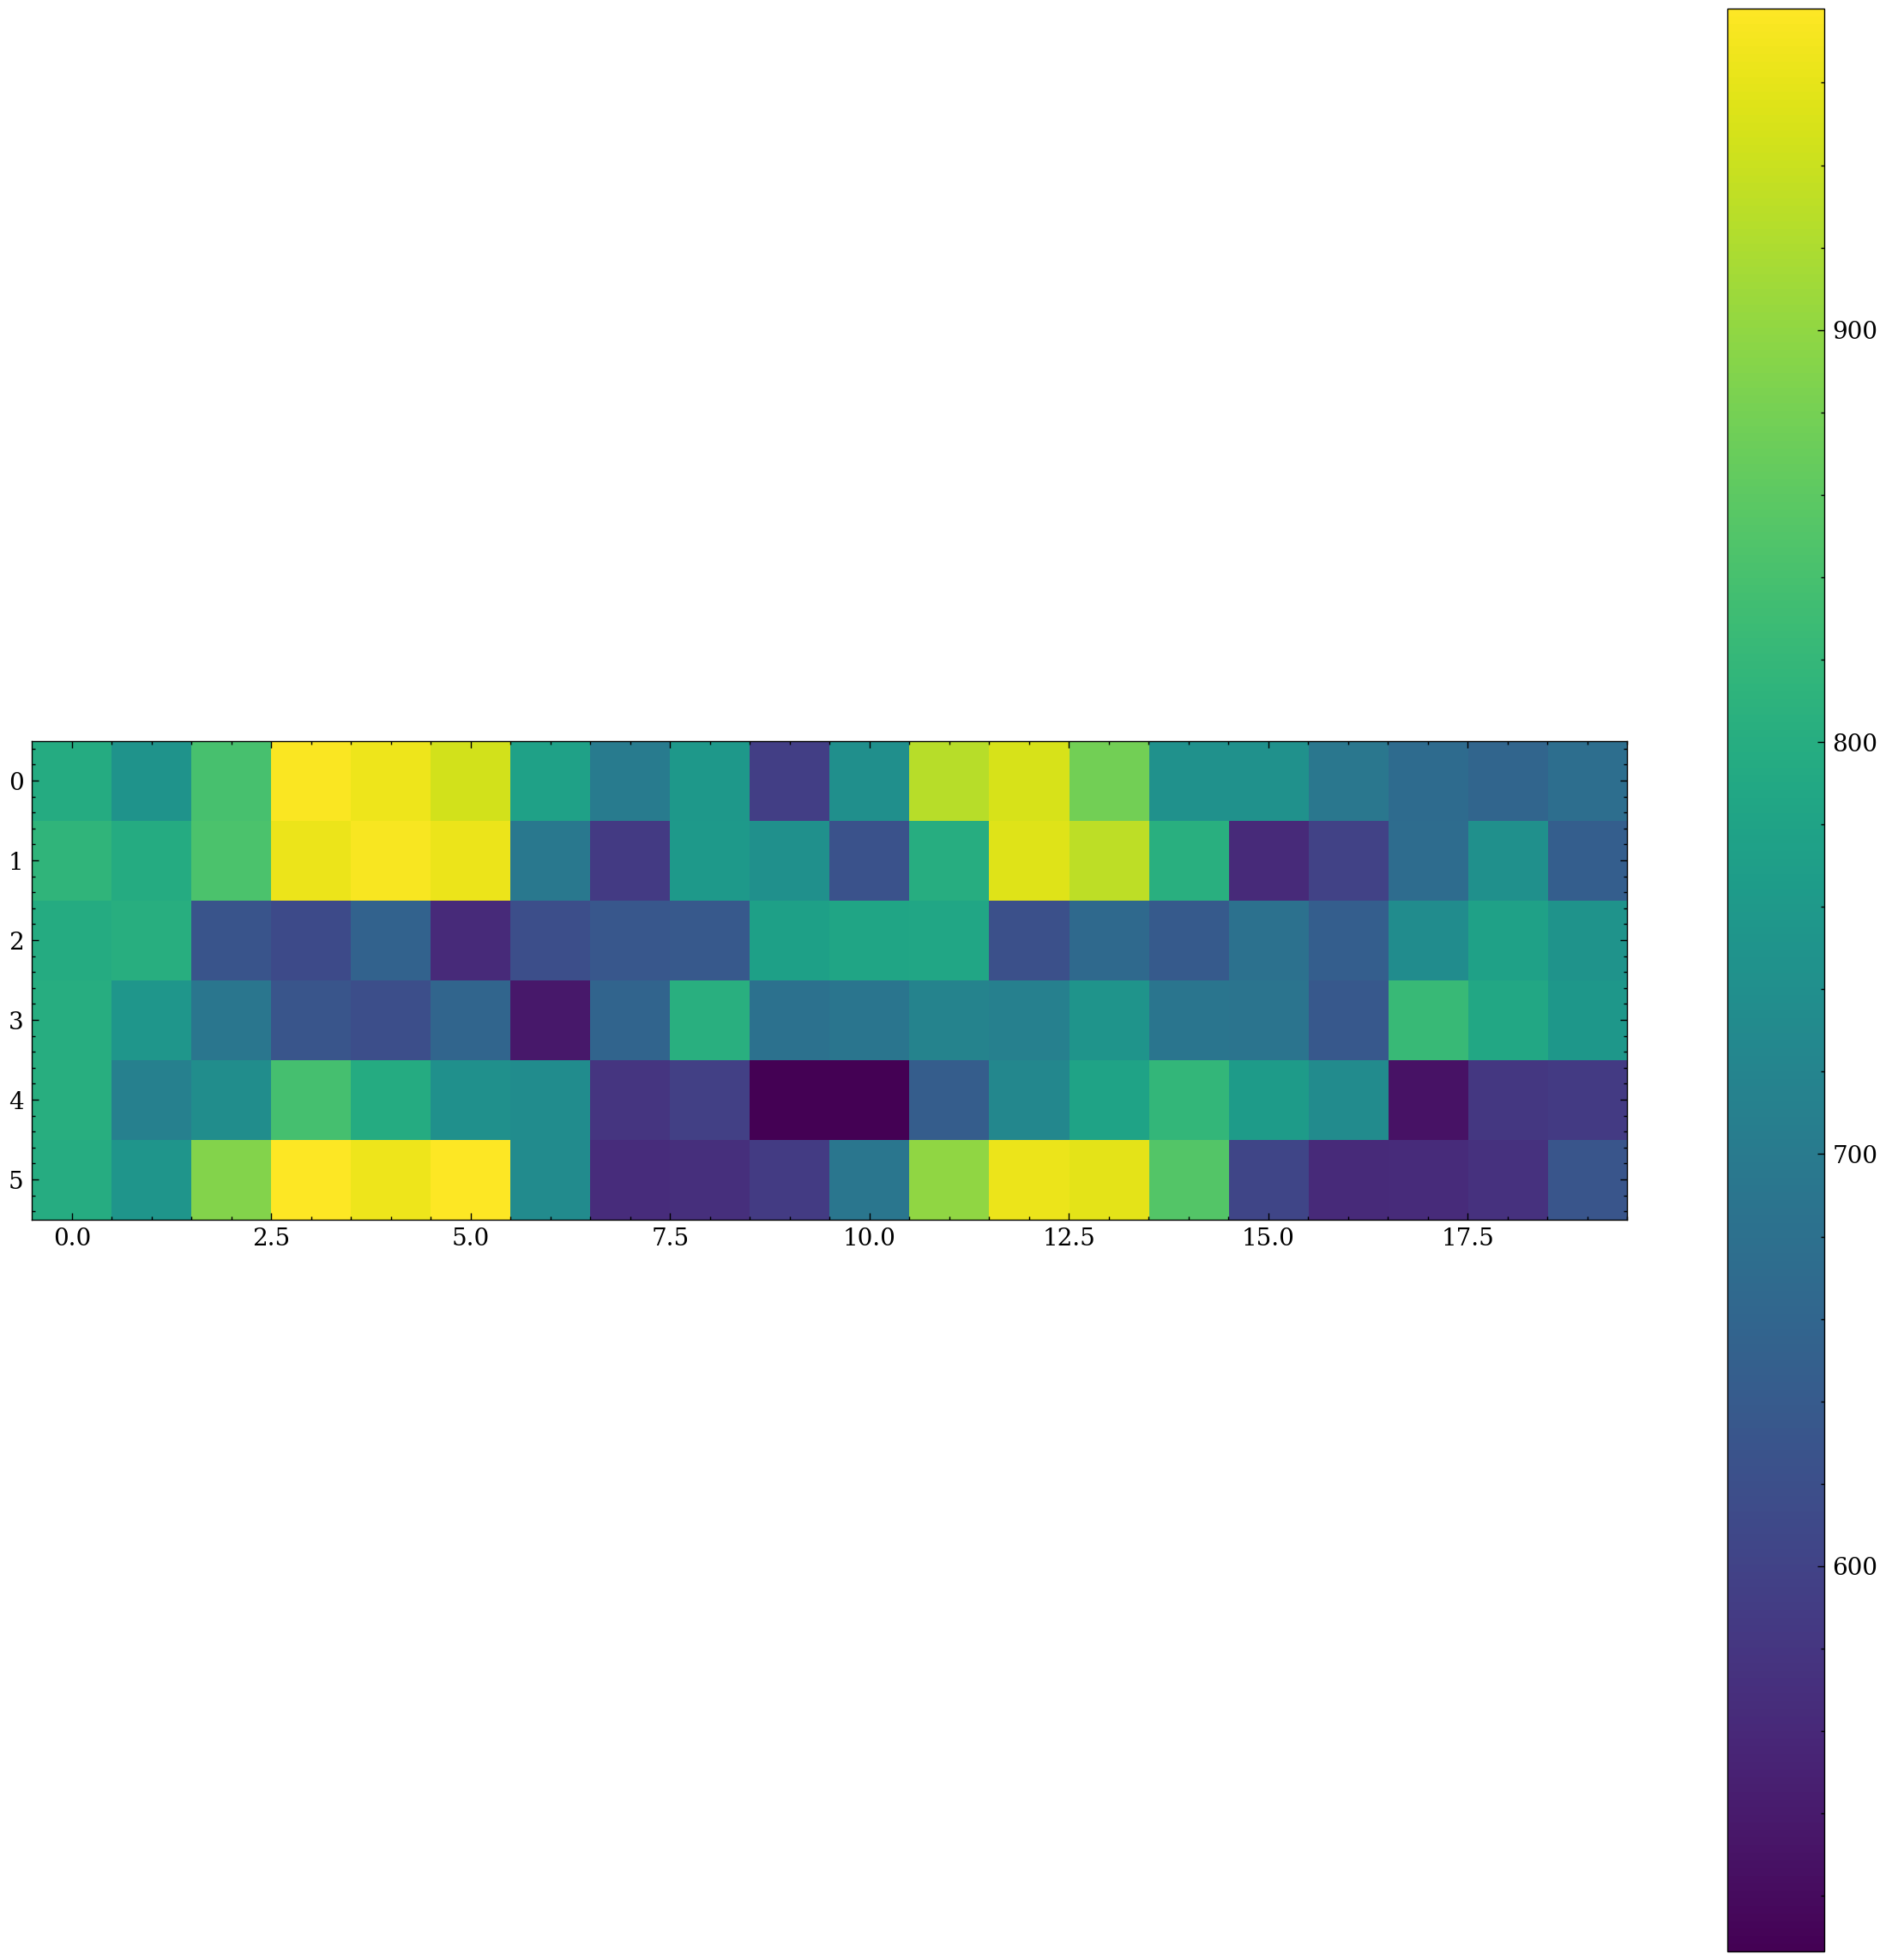

In [174]:
fig=plt.figure(figsize=(15, 15), dpi=200)
label = "flow_all"

data_plot=pd.concat([data_mpc[label],data_feedback[label],data_static[0][label],data_static[1][label],data_static[2][label],data_static[3][label]], axis=1)
data_plot=data_plot.astype('float').values.T
plt.imshow(data_plot)
plt.colorbar()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

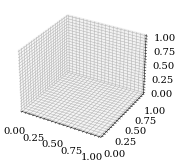

In [52]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt


# fig = plt.figure()
# ax = plt.axes(projection='3d')
# #调用plot_surface()函数
# x = np.arange(len(data_mpc))
# label = "time_all"
# list_data = [data_mpc[label],data_feedback[label],data_static[0][label],data_static[1][label],data_static[1][label]]
# data_plot = pd.concat(list_data, axis=1)
# data_plot=data_plot.astype('float').values.T
# y = np.arange(len(list_data))

# # ax.plot_surface(x, y, data_plot,cmap='viridis', edgecolor='none')
# # ax.set_title('Surface plot')
# # plt.show()

# # fig=plt.figure()
# # axes = plt.axes(projection = "3d")

# surf = axes.plot_surface(x, y, data_plot) # 使用get_cmap拿到提前定义好的color map
# plt.colorbar(surf)

In [35]:
len(data_mpc)

20

In [46]:
np.arange(len(list_data))


array([0, 1, 2, 3, 4])

In [47]:
data_plot


array([[379.88383838, 375.53985793, 386.23596304, 390.00331565,
        390.23111979, 391.5650165 , 386.79817276, 354.48441449,
        335.46307385, 339.52890173, 387.7131295 , 395.57050032,
        388.13509061, 390.67051071, 383.00429185, 369.15976331,
        366.19709544, 369.59518828, 358.87021277, 361.21716102],
       [377.78977741, 369.44131098, 385.15413819, 391.23649539,
        390.20768229, 390.08002602, 386.80299252, 365.8762421 ,
        337.69009901, 341.18      , 390.98836081, 410.70081199,
        392.17060703, 392.2585752 , 397.8141382 , 407.57876712,
        406.39764111, 415.31139241, 427.63115488, 478.62988115],
       [383.00082508, 368.76190476, 389.42087821, 444.12983663,
        490.64613073, 555.03330333, 617.72639011, 688.13322502,
        625.48863636, 473.48888889, 381.94029851, 387.13893511,
        384.86236194, 386.76666667, 384.39884393, 384.14786325,
        363.63859981, 361.31774708, 363.72992701, 358.95638298],
       [387.42235495, 371.77289932, 3

In [48]:
data_plot.size


100

In [50]:
np.arange(len(data_mpc))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])